In [603]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = 100

In [604]:
train_df = pd.read_csv('../../python-dev/titanic/train.csv')
test_df = pd.read_csv('../../python-dev/titanic/test.csv')


In [605]:
test_df[test_df['Fare'].isnull()==True]
train_df[train_df['Fare'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [606]:
answer = pd.read_csv('./answer_titanic_1.csv')
answer = answer['Survived'].tolist()

def get_Score(preds):
    TR = []
    for i, value in enumerate(answer):
        if value == preds[i]:
            TR.append(1)
        else:
            TR.append(0)
    return sum(TR)/len(preds)

aaa=pd.read_csv('./answer_titanic_1 copy.csv')
aaa=aaa['Survived'].tolist()

In [607]:
train_test_data = [train_df, test_df] # combining train and test dataset

train_df['Name'].str.split(' ')[1][0]

'Cumings,'

In [608]:
for dataset in train_test_data: 
 dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in train_test_data: 
    for i in range(dataset.shape[0]):
        dataset.loc[i,'last_Name']=dataset['Name'].str.split(' ')[i][0]
        # print(dataset.loc[i,'Last_Name'])




In [609]:
train_df['Title'].value_counts() # train에서의 title 의 명수
test_df['Title'].value_counts() # test에서의 title의 명수

train_df['last_Name'].nunique(),test_df['last_Name'].nunique()

(661, 351)

In [610]:
train_df['Age'].isnull().value_counts()

test_df.loc[88,]


PassengerId                        980
Pclass                               3
Name           O'Donoghue, Ms. Bridget
Sex                             female
Age                                NaN
SibSp                                0
Parch                                0
Ticket                          364856
Fare                              7.75
Cabin                              NaN
Embarked                             Q
Title                               Ms
last_Name                  O'Donoghue,
Name: 88, dtype: object

In [611]:
train_df.iloc[train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss')].index,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,"O'Dwyer,"
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss,"Glynn,"
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Miss,"O'Driscoll,"
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,Miss,"McDermott,"
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Miss,"Moran,"
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Miss,"Peter,"
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss,"Sage,"
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,Miss,"Madigan,"
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,Miss,"Lefebre,"
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S,Miss,"Harknett,"


In [612]:
(train_df['SibSp']+train_df['Parch']).iloc[792]

10

In [613]:
train_df['Cabin_suff'] = train_df[train_df['Cabin'].isnull()==False]['Cabin'].str[0]
test_df['Cabin_suff'] = test_df[train_df['Cabin'].isnull()==False]['Cabin'].str[0]

print(train_df[train_df['Cabin'].isnull()==False]['Cabin'].str)
train_df['Cabin_suff'].fillna('NN', inplace=True)
test_df['Cabin_suff'].fillna('NN', inplace=True)

In [614]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"Braund,",NN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"Cumings,",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"Heikkinen,",NN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"Futrelle,",C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"Allen,",NN


In [615]:
A = train_df[train_df['Cabin'].isnull()==False]
A1 = test_df[test_df['Cabin'].isnull()==False]

B = A['Cabin'].str.split()
B1 = A1['Cabin'].str.split()

B = B.str.len()
B1 = B1.str.len()

A['cabin_Cnt'] = B
A1['cabin_Cnt'] = B1

In [616]:
A['real_Fare'] = A['Fare']/A['cabin_Cnt']
A1['real_Fare'] = A1['Fare']/A1['cabin_Cnt']

# C['real_Fare'] = C['Fare'//]/C['cabin_Cnt']
# AA=pd.DataFrame(A['real_Fare'],A['PassengerId'])
# A1 = A['PassengerId']
# A2 = A['real_Fare']
# B = pd.concat([A1,A2], axis=1)
# B


In [617]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"Braund,",NN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"Cumings,",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"Heikkinen,",NN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"Futrelle,",C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"Allen,",NN


In [618]:
A.loc[A['real_Fare'].index,'Fare']

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 204, dtype: float64

In [619]:
train_df.loc[A['real_Fare'].index, 'Fare']=A.loc[A['real_Fare'].index,'Fare']
test_df.loc[A1['real_Fare'].index, 'Fare']=A1.loc[A1['real_Fare'].index,'Fare']

In [620]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"Braund,",NN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"Cumings,",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"Heikkinen,",NN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"Futrelle,",C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"Allen,",NN


In [621]:
test_df[test_df['PassengerId']<100]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff


In [622]:
### Fare


# train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
print(train_df.groupby("Pclass")["Fare"].mean())
print(test_df.groupby("Pclass")["Fare"].mean())

# first_Avg = train_df.groupby("Pclass")["Fare"].mean()+

(train_df.groupby("Pclass")["Fare"].mean().to_list()[0] +test_df.groupby("Pclass")["Fare"].mean().to_list()[0])/2

train_temp = train_df.drop('Survived', axis=1)
total_df = pd.concat([train_temp,test_df], axis=0)

first_Avg = np.round(total_df.groupby("Pclass")["Fare"].mean().to_list()[0],2)
sec_Avg = np.round(total_df.groupby("Pclass")["Fare"].mean().to_list()[1],2)
third_Avg = np.round(total_df.groupby("Pclass")["Fare"].mean().to_list()[2],2)

# train_df[(train_df["Pclass"]==1) & (train_df["Fare"].isnull()==True)]
# test_df[(test_df["Pclass"]==1) & (test_df["Fare"].isnull()==True)]
# test_df[(test_df["Pclass"]==2) & (test_df["Fare"].isnull()==True)] 
index_Temp = test_df[(test_df["Pclass"]==3) & (test_df["Fare"].isnull()==True)].index

test_df.loc[index_Temp, 'Fare'] = third_Avg

# test_df["Fare"].fillna(first_Avg)

print(third_Avg)

# train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

# test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64
13.3


In [623]:
test_df[test_df['PassengerId']<100]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff


In [624]:
train_df['Cabin_suff'].unique()
train_test_data

[     PassengerId  Survived  Pclass   
 0              1         0       3  \
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp   
 0                              Braund, Mr. Owen Harris    male  22.0      1  \
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [625]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8, "NN":3.2}
for dataset in train_test_data:
 dataset['Cabin'] = dataset['Cabin_suff'].map(cabin_mapping)

In [626]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,3.2,S,Mr,"Braund,",NN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,"Cumings,",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3.2,S,Miss,"Heikkinen,",NN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,"Futrelle,",C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3.2,S,Mr,"Allen,",NN


In [627]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,3.2,Q,Mr,"Kelly,",NN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,3.2,S,Mrs,"Wilkes,",NN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,3.2,Q,Mr,"Myles,",NN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,3.2,S,Mr,"Wirz,",NN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,3.2,S,Mrs,"Hirvonen,",NN


In [628]:
for dataset in train_test_data: 
    dataset['fam_Size'] = dataset['SibSp']+dataset['Parch']


for dataset in train_test_data: 
    dataset.loc[dataset[(dataset['fam_Size']>1) & (dataset['Title']=='Mr')].index,'Father'] = 1
    dataset.loc[dataset[(dataset['fam_Size']<=1) | (dataset['Sex']=='female')].index,'Father'] = 0
    dataset.loc[dataset[(dataset['fam_Size']<=1) | (dataset['Sex']=='male')].index,'Father'] = 0
    # dataset['Father'] = dataset['SibSp']+dataset['Parch']



train_df.iloc[train_df[(train_df['fam_Size']>1) & (train_df['Title']=='Mr')].index,:]


train_df.loc[train_df[(train_df['fam_Size']>1) & (train_df['Title']=='Mr')].index,'Father'] = 1
train_df.loc[train_df[(train_df['fam_Size']<=1) | (train_df['Sex']=='female')].index,'Father'] = 0


In [629]:
train_df[train_df['Father'].isnull()==True]

train_df[train_df['Title']=='Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,3.2,S,Ms,"Reynaldo,",NN,0,0.0


In [630]:

train_df[(train_df['fam_Size']>1) & (train_df['Title']=='Mr')]
train_df[(train_df['fam_Size']<=1) | (train_df['Sex']=='female')]

# train_df.iloc[792]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,3.2,S,Mr,"Braund,",NN,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,Mrs,"Cumings,",C,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3.2,S,Miss,"Heikkinen,",NN,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,Mrs,"Futrelle,",C,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3.2,S,Mr,"Allen,",NN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,3.2,S,Rev,"Montvila,",NN,0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0.4,S,Miss,"Graham,",B,0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,3.2,S,Miss,"Johnston,",NN,3,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0.8,C,Mr,"Behr,",C,0,0.0


In [631]:
tot_Miss = train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss')]
train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss')].shape
# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Mr')].shape

# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss')]['Age'].plot(style='.')

# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['Age']>31)]

# 177-(119+36)

# train_df[(train_df['Age'].isnull()==True)]['Title'].unique()
test_df[(test_df['Age'].isnull()==True)]['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Ms', 'Master'], dtype=object)

In [632]:
test_df[test_df['PassengerId']<100]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father


35.898148148148145 35.25


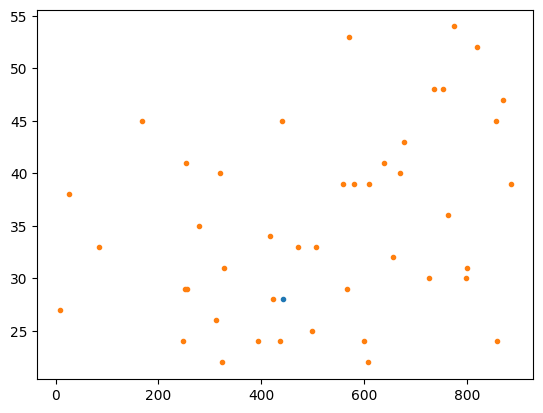

In [633]:
# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Mrs')]['Age'].plot(style='.')
# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Master')]['Age'].plot(style='.')
# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Dr')]['Age'].plot(style='.')
# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Mr')]['Age'].plot(style='.')
# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss')]['Age'].plot(style='.')
train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Ms')]['Age'].plot(style='.')

# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']==0) ]['Age'].plot(style='.')
# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
        #  & (train_df['SibSp']==0)]['Age'].plot(style='.') # 외동딸 

# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
        #  & (train_df['Parch']==0)]['Age'].plot(style='.') # 자매끼리 

# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']==0)  \
        #  ]['Age'].plot(style='.')


# train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
#          & (train_df['Parch']>0) & (train_df['SibSp']>0)]['Age'].plot(style='.') #대가족에서 딸

# train_df[(train_df['Age'].isnull()==False) & (train_df['fam_Size']>1) & (train_df['Title']=='Mr')]['Age'].plot(style='.') # 아빠
# train_df[(train_df['Age'].isnull()==False) & (train_df['fam_Size']>1) & (train_df['Title']=='Mr')] # 아빠


train_df[(train_df['Age'].isnull()==False) & (train_df['fam_Size']>1) & (train_df['Title']=='Mrs')]['Age'].plot(style='.') # 엄마
# train_df[(train_df['Age'].isnull()==False) & (train_df['fam_Size']>1) & (train_df['Title']=='Mrs')] # 엄마

print(train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Mrs')]['Age'].mean() , train_df[(train_df['Age'].isnull()==False) \
         & (train_df['fam_Size']>1) & (train_df['Title']=='Mrs')]['Age'].mean())

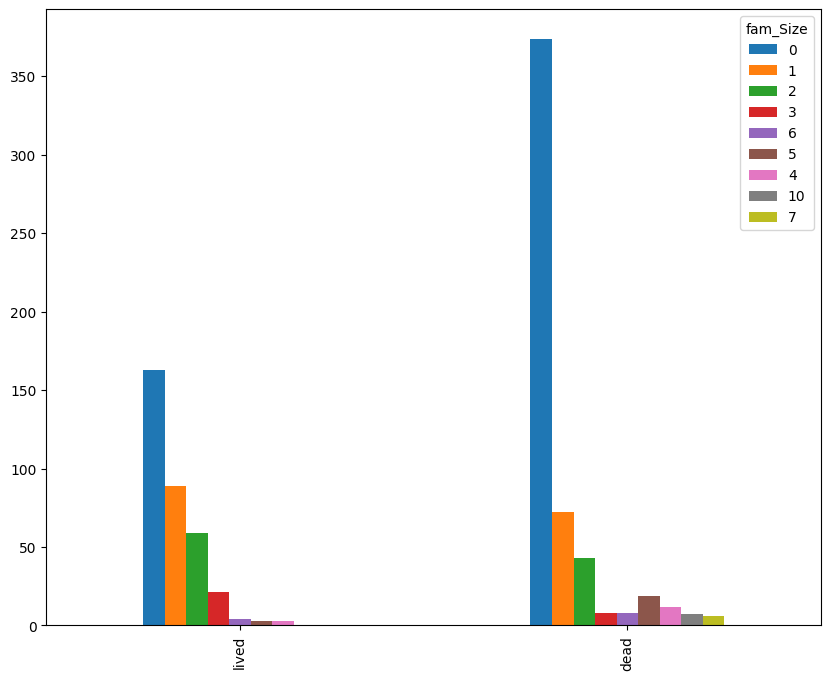

In [634]:
train_df['last_Name'].unique().shape
# family = train_df[(train_df['fam_Size']>1) & (train_df['Title']=='Mr')] # 아빠
# family = train_df[(train_df['fam_Size']>1) & (train_df['Title']=='Mrs')] # 엄마
# family = train_df[(train_df['fam_Size']>1) & (train_df['Title']=='Miss')] # 딸
# family = train_df[(train_df['fam_Size']>1) & (train_df['Title']=='Master')] # 아들

family = train_df[(train_df['fam_Size']>=0)]# & (train_df['Title']=='Mr')] # 아빠

def bar_chart_class(feature):
    Survived = family[family['Survived']==1][feature].value_counts()
    Dead = family[family['Survived']==0][feature].value_counts()
    df = pd.DataFrame([Survived, Dead])
    df.index = ['lived','dead']
    df.plot(kind='bar', figsize=(10,8))

family.shape

bar_chart_class('fam_Size')



In [635]:
train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
         & (train_df['Parch']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,3.2,S,Miss,Vander,NN,2,0.0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,3.2,C,Miss,"Nicola-Yarred,",NN,1,0.0
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,3.2,C,Miss,"Zabour,",NN,1,0.0
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,3.2,S,Miss,"Jussila,",NN,1,0.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,3.2,S,Miss,"Andersen-Jensen,",NN,1,0.0
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,1.2,C,Miss,"Newell,",D,1,0.0
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,1.2,S,Miss,"Andrews,",D,1,0.0
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,1.2,C,Miss,"Newell,",D,1,0.0
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,3.2,S,Miss,"Jussila,",NN,1,0.0
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,0.8,Q,Miss,"Minahan,",C,1,0.0


In [636]:
# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Mrs')]['Age'].plot(style='.')
# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Master')]['Age'].plot(style='.')
# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Dr')]['Age'].plot(style='.')
# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Mr')]['Age'].plot(style='.')
# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Miss')& (test_df['fam_Size']==0)]['Age'].plot(style='.')
test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Ms')]

# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0)  \
        #  & (test_df['SibSp']==0)]['Age'].plot(style='.')

# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0)  \
        #  & (test_df['Parch']==0)]['Age'].plot(style='.')

# test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0)  \
#          & (test_df['Parch']>0) & (test_df['SibSp']>0)]['Age'].plot(style='.') # #대가족 딸




,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father


In [637]:
# 나이 Master 처리
master_Avg= (np.average(train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Master')]['Age']) + \
 np.average(test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Master')]['Age'])) /2

print(round(master_Avg))

for data in train_test_data:
    data.loc[data[(data['Age'].isnull()==True) & (data['Title']=='Master')].index.values.tolist(),'Age'] = round(master_Avg)


6


In [638]:
####

for data in train_test_data:
    print(np.round(data.groupby('Title')['Age'].mean()))




Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Jonkheer    38.0
Lady        48.0
Major       48.0
Master       5.0
Miss        22.0
Mlle        24.0
Mme         24.0
Mr          32.0
Mrs         36.0
Ms          28.0
Rev         43.0
Sir         49.0
Name: Age, dtype: float64
Title
Col       50.0
Dona      39.0
Dr        53.0
Master     7.0
Miss      22.0
Mr        32.0
Mrs       39.0
Ms         NaN
Rev       36.0
Name: Age, dtype: float64


In [639]:
# train_df.loc[train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Master')].index.values.tolist(),'Age'] = round(master_Avg)

# # train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Master')] =  round(master_Avg)

# train_df.loc[train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Master')].index.values.tolist(),'Age'] = round(master_Avg)

# # train_df.loc[train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Master')].index.values.tolist(),'Age'] = round(master_Avg)

# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Master')] =  round(master_Avg)

# # train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Master')]


In [640]:
# 나이 Dr, Ms 처리
dr_Avg= (np.average(train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Dr')]['Age']) + \
 np.average(test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Dr')]['Age'])) /2

print(dr_Avg)


for data in train_test_data:
    data.loc[data[(data['Age'].isnull()==True) & (data['Title']=='Dr')].index.values.tolist(),'Age'] = round(dr_Avg)



# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Dr')] =  round(dr_Avg)
# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Dr')] =  round(dr_Avg)


test_df.loc[test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Ms')].index.values.tolist(),'Age'] = \
    train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Ms')]['Age'].iloc[0]
# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Ms')]['Age'] = \


47.5


In [641]:
test_df.loc[88,]
# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss') & (train_df['fam_Size']==0)].index.values.tolist()

PassengerId                        980
Pclass                               3
Name           O'Donoghue, Ms. Bridget
Sex                             female
Age                               28.0
SibSp                                0
Parch                                0
Ticket                          364856
Fare                              7.75
Cabin                              3.2
Embarked                             Q
Title                               Ms
last_Name                  O'Donoghue,
Cabin_suff                          NN
fam_Size                             0
Father                             0.0
Name: 88, dtype: object

In [642]:
# 나이 Miss 처리

miss_parchAvg = (np.average(train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
         & (train_df['SibSp']==0)]['Age']) + np.average(test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0)  \
         & (test_df['SibSp']==0)]['Age']))/2

print(miss_parchAvg)


for data in train_test_data:
    data.loc[data[(data['Age'].isnull()==True) & (data['Title']=='Miss') & (data['fam_Size']>0) \
                   & (data['SibSp']==0)].index.values.tolist() ,'Age'] = round(miss_parchAvg)


# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
#          & (train_df['SibSp']==0)] = round(miss_parchAvg)

# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0)  \
#          & (test_df['SibSp']==0)] = round(miss_parchAvg)





miss_sibspAvg = (np.average(train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
         & (train_df['Parch']==0)]['Age']) + np.average(test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0)  \
         & (test_df['Parch']==0)]['Age']))/2


print(miss_sibspAvg)


for data in train_test_data:
    data.loc[data[(data['Age'].isnull()==True) & (data['Title']=='Miss') & (data['fam_Size']>0) \
                   & (data['Parch']==0)].index.values.tolist() ,'Age'] = round(miss_sibspAvg)



# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0) \
#          & (train_df['Parch']==0)] = round(miss_sibspAvg)

# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0) \
#          & (test_df['Parch']==0)] = round(miss_sibspAvg)



miss_nofamAvg = (train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']==0)  \
         ]['Age'].mean() + test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Miss') & (test_df['fam_Size']==0)  \
         ]['Age'].mean())/2

print(miss_nofamAvg)

for data in train_test_data:
    data.loc[data[(data['Age'].isnull()==True) & (data['Title']=='Miss') & (data['fam_Size']==0)].index.values.tolist(), 'Age'] = round(miss_nofamAvg)




# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss') & (train_df['fam_Size']==0)] = round(miss_nofamAvg)
# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Miss') & (test_df['fam_Size']==0)] = round(miss_nofamAvg)



miss_famAvg = train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
         & (train_df['Parch']>0) & (train_df['SibSp']>0) & (train_df['Age']<26)]['Age'].mean()

print(miss_famAvg)


for data in train_test_data:
    data.loc[data[(data['Age'].isnull()==True) & (data['Title']=='Miss') & (data['fam_Size']>0)\
             & (data['Parch']>0) & (data['SibSp']>0)].index.values.tolist(), 'Age'] = round(miss_famAvg)

# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss') & (train_df['fam_Size']>0)  \
#          & (train_df['Parch']>0) & (train_df['SibSp']>0)] = round(miss_famAvg)

# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Miss') & (test_df['fam_Size']>0)  \
#          & (test_df['Parch']>0) & (test_df['SibSp']>0)] = round(miss_famAvg)


print(train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss')].shape)
print(test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Miss')].shape)

16.654545454545453
26.317307692307693
26.96794871794872
9.609375
(0, 17)
(0, 16)


In [643]:
# 나이 Mr, Mrs 처리 ### Mr 아빠 처리, Mrs 엄마처리

Mr_Avg = (train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Mr')]['Age'].mean() + \
    test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Mr')]['Age'].mean())/2

print(Mr_Avg)


for data in train_test_data:
    data.loc[data[(data['Age'].isnull()==True) & (data['Title']=='Mr')].index.values.tolist(), 'Age'] = round(Mr_Avg)


# train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Mr')] = round(Mr_Avg)
# test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Mr')] = round(Mr_Avg)
train_df.loc[train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Mr')].index, 'Age'] = Mr_Avg


Mrs_Avg = (train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Mrs')]['Age'].mean() + \
    test_df[(test_df['Age'].isnull()==False) & (test_df['Title']=='Mrs')]['Age'].mean())/2

print(Mrs_Avg)

train_df.loc[train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Mrs')].index.values,'Age'] = round(Mrs_Avg)
test_df.loc[test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Mrs')].index.values, 'Age'] = round(Mrs_Avg)


32.18404522613065
37.400686977299884


In [644]:
train_df[(train_df['Age'].isnull()==False) & (train_df['Title']=='Mr')]
# train_df.loc[5]
train_df.head(10)
test_df[test_df['PassengerId']<100]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father


In [645]:
train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss')]
test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Miss')]
test_df.loc[5]

PassengerId                           897
Pclass                                  3
Name           Svensson, Mr. Johan Cervin
Sex                                  male
Age                                  14.0
SibSp                                   0
Parch                                   0
Ticket                               7538
Fare                                9.225
Cabin                                 3.2
Embarked                                S
Title                                  Mr
last_Name                       Svensson,
Cabin_suff                             NN
fam_Size                                0
Father                                0.0
Name: 5, dtype: object

In [646]:
print(train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Master')].shape) # 4개
print(train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Mr')].shape) #119개
print(train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Mrs')].shape) # 17개
print(train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Miss')].shape) # 36개
print(train_df[(train_df['Age'].isnull()==True) & (train_df['Title']=='Dr')].shape) # 1개

print(test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Master')].shape) # ?개
print(test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Mr')].shape) #47개
print(test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Mrs')].shape) # 10개
print(test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Miss')].shape) # 14개
print(test_df[(test_df['Age'].isnull()==True) & (test_df['Title']=='Dr')].shape) # 0개

(0, 17)
(0, 17)
(0, 17)
(0, 17)
(0, 17)
(0, 16)
(0, 16)
(0, 16)
(0, 16)
(0, 16)


In [647]:
test_df[test_df['PassengerId']<100]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father


In [648]:
train_df[(train_df['Age'].isnull()==False) & (train_df['fam_Size']>1) & (train_df['Title']=='Mr')] 
train_df.loc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                   32.184045
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       3.2
Embarked                      Q
Title                        Mr
last_Name                Moran,
Cabin_suff                   NN
fam_Size                      0
Father                      0.0
Name: 5, dtype: object

In [649]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father
0,1,0,3,"Braund, Mr. Owen Harris",male,32.184045,1,0,A/5 21171,7.2500,3.2,S,Mr,"Braund,",NN,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0.8,C,Mrs,"Cumings,",C,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,3.2,S,Miss,"Heikkinen,",NN,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0.8,S,Mrs,"Futrelle,",C,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,32.184045,0,0,373450,8.0500,3.2,S,Mr,"Allen,",NN,0,0.0


---
↑↑↑↑나이 처리↑↑↑↑
---


In [650]:
train_pre = train_df.copy()
test_pre = test_df.copy()

# train_pre.head()

In [651]:
# 4.6 Fare: 가격
# test[test['Fare'].isnull()]

fare_Mean  = (train_pre[train_pre['Fare']<300]['Fare'].mean()+ test_pre[test_pre['Fare']<300]['Fare'].mean())/2

print(fare_Mean)
test_pre['Fare'].fillna(
    fare_Mean
    , inplace = True
)

test_pre['Fare'].isnull().sum()

# test_pre.

32.506319927976534


0

In [652]:
# 매핑

AGE_RANGE = 10


train_test_data_pre = [train_pre, test_pre]

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
 "Master": 4, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3, "Capt": 3,"Sir": 3 }

for dataset in train_test_data_pre :
    dataset['Title'] = dataset['Title'].map(title_mapping)

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data_pre :
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)


for dataset in train_test_data_pre :

    age_Range = list(range(0,60,AGE_RANGE))

    for i, age in enumerate(age_Range):
        dataset.loc[(dataset['Age'] > age) & (dataset['Age'] <= age+10), 'Age'] = i
        if i==(len(age_Range)-1):
            dataset.loc[dataset['Age'] > age, 'Age'] = i




for dataset in train_test_data_pre:
 dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
 dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 1
 dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 2
 dataset.loc[ dataset['Fare'] > 30, 'Fare'] = 3

    # dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    # dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 15), 'Age'] = 1
    # dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 2
    # dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= ), 'Age'] = 3
    # dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    # dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    # dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    # dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    # dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    # dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    # dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    # dataset.loc[ dataset['Age'] > 62, 'Age'] = 4


family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

for dataset in train_test_data_pre:
 dataset['fam_Size'] = dataset['fam_Size'].map(family_mapping)

#  dataset.loc[ dataset['fam_Size'] == 0, 'fam_Size'] = 0
#  dataset.loc[ dataset['fam_Size'] == 1, 'fam_Size'] = 1
#  dataset.loc[ dataset[(dataset['fam_Size'] >= 2) & (dataset['fam_Size'] < 5)].index.values , 'fam_Size'] = 2
#  dataset.loc[ dataset['fam_Size'] >=5 , 'fam_Size'] = 3



train_pre.loc[train_pre['SibSp'] != 0, 'SibSp'] = 1
train_pre.loc[train_pre['Parch'] != 0, 'Parch'] = 1

test_pre.loc[test_pre['SibSp'] != 0, 'SibSp'] = 1
test_pre.loc[test_pre['Parch'] != 0, 'Parch'] = 1

In [653]:
test_pre.head()
train_pre.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father
0,1,0,3,"Braund, Mr. Owen Harris",0,3.0,1,0,A/5 21171,0.0,3.2,S,0,"Braund,",NN,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,3.0,0.8,C,2,"Cumings,",C,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,3.2,S,1,"Heikkinen,",NN,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,3.0,0.8,S,2,"Futrelle,",C,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,0.0,3.2,S,0,"Allen,",NN,NaN,0.0
5,6,0,3,"Moran, Mr. James",0,3.0,0,0,330877,0.0,3.2,Q,0,"Moran,",NN,NaN,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,3.0,1.6,S,0,"McCarthy,",E,NaN,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,1,1,349909,2.0,3.2,S,4,"Palsson,",NN,1.2,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,1,347742,1.0,3.2,S,2,"Johnson,",NN,0.4,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,3.0,3.2,C,2,"Nasser,",NN,0.0,0.0


In [654]:
from sklearn.preprocessing import MinMaxScaler

mmx = MinMaxScaler()

for data in train_test_data_pre:
    data['Fare'] = np.round(mmx.fit_transform(data[['Fare']]),2)
    data['Pclass'] = np.round(mmx.fit_transform(data[['Cabin']]),2)
    data['Pclass'] = np.round(mmx.fit_transform(data[['Pclass']]),2)
    data['Age'] = np.round(mmx.fit_transform(data[['Age']]),2)
    data['fam_Size'] = np.round(mmx.fit_transform(data[['fam_Size']]),2)
    data['Title'] = np.round(mmx.fit_transform(data[['Title']]),2)

In [655]:
train_pre.head(20)
test_pre.head(20)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father
0,892,1.0,"Kelly, Mr. James",0,0.6,0,0,330911,0.00,3.2,Q,0.00,"Kelly,",NN,NaN,0.0
1,893,1.0,"Wilkes, Mrs. James (Ellen Needs)",1,0.8,1,0,363272,0.00,3.2,S,0.50,"Wilkes,",NN,0.00,0.0
2,894,1.0,"Myles, Mr. Thomas Francis",0,1.0,0,0,240276,0.00,3.2,Q,0.00,"Myles,",NN,NaN,0.0
3,895,1.0,"Wirz, Mr. Albert",0,0.4,0,0,315154,0.00,3.2,S,0.00,"Wirz,",NN,NaN,0.0
4,896,1.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.4,1,1,3101298,0.33,3.2,S,0.50,"Hirvonen,",NN,0.11,0.0
5,897,1.0,"Svensson, Mr. Johan Cervin",0,0.2,0,0,7538,0.00,3.2,S,0.00,"Svensson,",NN,NaN,0.0
6,898,1.0,"Connolly, Miss. Kate",1,0.4,0,0,330972,0.00,3.2,Q,0.25,"Connolly,",NN,NaN,0.0
7,899,1.0,"Caldwell, Mr. Albert Francis",0,0.4,1,1,248738,0.67,3.2,S,0.00,"Caldwell,",NN,0.11,0.0
8,900,1.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,0.2,0,0,2657,0.00,3.2,C,0.50,"Abrahim,",NN,NaN,0.0
9,901,1.0,"Davies, Mr. John Samuel",0,0.4,1,0,A/4 48871,0.67,3.2,S,0.00,"Davies,",NN,0.11,0.0


In [656]:
test_pre.head(20)



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,last_Name,Cabin_suff,fam_Size,Father
0,892,1.0,"Kelly, Mr. James",0,0.6,0,0,330911,0.00,3.2,Q,0.00,"Kelly,",NN,NaN,0.0
1,893,1.0,"Wilkes, Mrs. James (Ellen Needs)",1,0.8,1,0,363272,0.00,3.2,S,0.50,"Wilkes,",NN,0.00,0.0
2,894,1.0,"Myles, Mr. Thomas Francis",0,1.0,0,0,240276,0.00,3.2,Q,0.00,"Myles,",NN,NaN,0.0
3,895,1.0,"Wirz, Mr. Albert",0,0.4,0,0,315154,0.00,3.2,S,0.00,"Wirz,",NN,NaN,0.0
4,896,1.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.4,1,1,3101298,0.33,3.2,S,0.50,"Hirvonen,",NN,0.11,0.0
5,897,1.0,"Svensson, Mr. Johan Cervin",0,0.2,0,0,7538,0.00,3.2,S,0.00,"Svensson,",NN,NaN,0.0
6,898,1.0,"Connolly, Miss. Kate",1,0.4,0,0,330972,0.00,3.2,Q,0.25,"Connolly,",NN,NaN,0.0
7,899,1.0,"Caldwell, Mr. Albert Francis",0,0.4,1,1,248738,0.67,3.2,S,0.00,"Caldwell,",NN,0.11,0.0
8,900,1.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,0.2,0,0,2657,0.00,3.2,C,0.50,"Abrahim,",NN,NaN,0.0
9,901,1.0,"Davies, Mr. John Samuel",0,0.4,1,0,A/4 48871,0.67,3.2,S,0.00,"Davies,",NN,0.11,0.0


In [657]:
test_pre.to_csv('./test_pre.csv')

In [658]:
# drop 할 요소들

drop_features=[  # 남길껄 주석처리
    'PassengerId'
    , 'Name'
    # , 'Pclass'
    # , 'Sex'
    # , 'SibSp'
    # , 'Parch'
    , 'Ticket'
    # , 'Fare'
    # , 'Cabin'
    , 'Embarked'
    # , 'Title'
    , 'last_Name'
    , 'Cabin_suff'
    , 'fam_Size'
    # , 'Father'
    ]

train_pre = train_pre.drop(drop_features, axis=1, inplace=False)
test_pre = test_pre.drop(drop_features, axis=1, inplace=False)

train_pre.loc[5]

Survived    0.0
Pclass      1.0
Sex         0.0
Age         0.6
SibSp       0.0
Parch       0.0
Fare        0.0
Cabin       3.2
Title       0.0
Father      0.0
Name: 5, dtype: float64

In [659]:
# train_pre.head()
test_pre[test_pre['Cabin'].isnull()==True]

# test_pre.loc[152,]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,Father


In [660]:
train_data = train_pre.drop('Survived', axis =1)
target = train_pre['Survived']

In [661]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [662]:
# 오래걸림
from sklearn.model_selection import GridSearchCV

params = {
    # 'n_estimators':[100,200,300],
    'n_estimators':[20,30,40,50,60],
    'max_depth' : [2,4,6, 8, 10, 12], # tree 갯수
    'min_samples_leaf' : [4,5,6,8, 12, 18 ], # 리가 되기위한 최 데이터 수
    'min_samples_split' : [4,6,7,8] # 분리되기위한 최소 데이터 수
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1) # cpu 전체 코어 사용 = 병렬처리 가능
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=3, n_jobs=-1 )
grid_cv.fit(train_data , target)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


# {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 100}


최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 30}
최고 예측 정확도: 0.8148


In [663]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = RandomForestClassifier(max_depth= grid_cv.best_params_['max_depth'], min_samples_leaf= grid_cv.best_params_['min_samples_leaf']\
                             , min_samples_split= grid_cv.best_params_['min_samples_split'], n_estimators= grid_cv.best_params_['n_estimators']) #Model object
scoring = 'accuracy' # 평가지표: 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())
clf.fit(train_data , target)
pred_rf = clf.predict(test_pre)
# print('RandomForest 정확도: {0:.4f}'.format(accuracy_score(data, pred_rf)))

preds_rf = pred_rf.tolist()

# aaa

get_Score(preds_rf)

0.8136828963795256


0.7511961722488039

In [664]:
# feature_columns = ['Pclass','Sex','Age','Fare','Title']
x = train_data
y = target

In [665]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((712, 9), (179, 9))

In [666]:
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }

In [667]:
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=200, 
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

In [668]:
trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=100, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, 
            rstate=np.random.default_rng(seed=42))
print('best:', best)

100%|██████████| 100/100 [00:15<00:00,  6.34trial/s, best loss: -0.8230625583566761]
best: {'colsample_bytree': 0.5594523182951749, 'learning_rate': 0.05105721895120013, 'max_depth': 18.0, 'min_child_weight': 2.0}


In [669]:
np.int16(best['max_depth'])

18

In [670]:
xgb = XGBClassifier(colsample_bytree=best['colsample_bytree'], learning_rate=best['learning_rate'], max_depth=np.int16(best['max_depth']), min_child_weight=best['min_child_weight'])
xgb.fit(X_train, y_train)
preds = xgb.predict(test_pre)
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [671]:
xgb = XGBClassifier(objective='binary:logistic', tree_method='gpu_hist')
params = {
    #   'n_estimators':[250, 280, 300, 320, 350]
    'n_estimators':[350, 370, 390, 410]
    # , 'learning_rate':[0.01, 0.05, 0.1, 0.15, 0.2]
        , 'learning_rate':[ 0.2, 0.25, 0.3, 0.35]
    # , 'max_depth':[4,6,8,10,12]
    , 'max_depth':[1,2,3,4]
}
xgb_grid = GridSearchCV(xgb, param_grid=params, scoring='f1_macro', n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)

print('최고 예측 정확도 : {0:.4f}'.format(xgb_grid.best_score_))
print('최적의 하이퍼 파라미터 : ', xgb_grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
최고 예측 정확도 : 0.7997
최적의 하이퍼 파라미터 :  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 410}


In [672]:
xgb_grid.best_params_['n_estimators']

410

In [673]:
xgb = XGBClassifier(learning_rate=xgb_grid.best_params_['learning_rate'], max_depth=xgb_grid.best_params_['max_depth'], n_estimators=xgb_grid.best_params_['n_estimators']) # colsample_bytree=0.8, gamma=2
xgb.fit(X_train, y_train)
preds = xgb.predict(test_pre)
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [674]:
preds = preds.tolist()
answer = pd.read_csv('./answer_titanic_1.csv')
answer = answer['Survived'].tolist()

def get_Score(preds):
    TR = []
    for i, value in enumerate(answer):
        if value == preds[i]:
            TR.append(1)
        else:
            TR.append(0)
    return sum(TR)/len(preds)

aaa=pd.read_csv('./answer_titanic_1 copy.csv')
aaa=aaa['Survived'].tolist()
# aaa

get_Score(preds)

0.7535885167464115